# Introduction

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), we can build a model that can predict wether or nor a borrower will pay back their loan

The "loan_status" column contains our label.

### Importing libraries

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(font_scale=1.5)

### Reading data

In [2]:
data0=pd.read_csv('lending_club_loan_two.csv')

In [3]:
data0.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [4]:
info=pd.read_csv("lending_club_info.csv")

In [5]:
info

,LoanStatNew,Description
0,loan_amnt,The listed amount of the loan applied for by t...
1,term,The number of payments on the loan. Values are...
2,int_rate,Interest Rate on the loan
3,installment,The monthly payment owed by the borrower if th...
4,grade,LC assigned loan grade
5,sub_grade,LC assigned loan subgrade
6,emp_title,The job title supplied by the Borrower when ap...
7,emp_length,Employment length in years. Possible values ar...
8,home_ownership,The home ownership status provided by the borr...
9,annual_inc,The self-reported annual income provided by th...


In [6]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

# EDA

## Target column

In [11]:
data1=data0.copy()

In [12]:
data1.loan_status.head()

0     Fully Paid
1     Fully Paid
2     Fully Paid
3     Fully Paid
4    Charged Off
Name: loan_status, dtype: object

### Encoding target column

In [15]:
data1.loan_status=pd.get_dummies(data1.loan_status,drop_first=True)

In [16]:
data1.loan_status.head()

0    1
1    1
2    1
3    1
4    0
Name: loan_status, dtype: uint8

## Correlations

In [46]:
data1.corr().loan_status.sort_values()[:-1]

int_rate               -0.247758
revol_util             -0.082373
dti                    -0.062413
loan_amnt              -0.059836
installment            -0.041082
open_acc               -0.028012
pub_rec                -0.019933
pub_rec_bankruptcies   -0.009383
revol_bal               0.010892
total_acc               0.017893
annual_inc              0.053432
mort_acc                0.073111
Name: loan_status, dtype: float64

<AxesSubplot:>

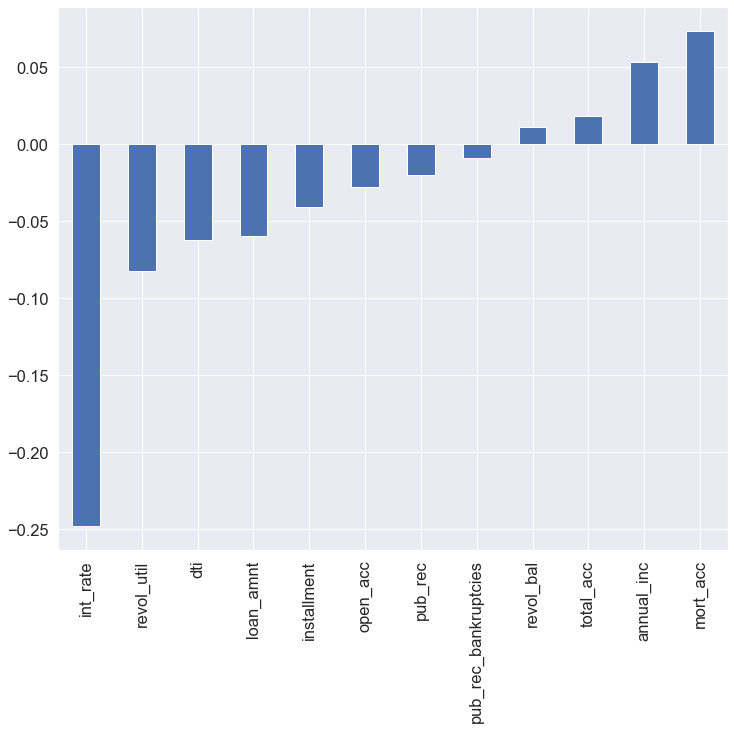

In [29]:
plt.figure(figsize=(12,10))
data1.corr().loan_status.sort_values()[:-1].plot(kind='bar')

In [38]:
correl=pd.DataFrame(data1.corr().loan_status.sort_values()[:-1]).reset_index()

<AxesSubplot:xlabel='loan_status', ylabel='index'>

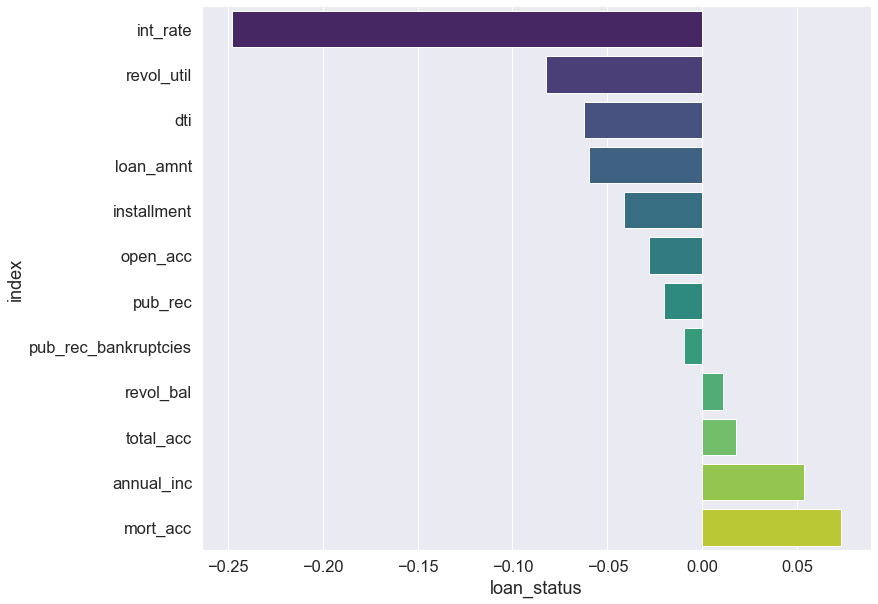

In [45]:
plt.figure(figsize=(12,10))
sns.barplot(y='index',x='loan_status',data=correl,palette='viridis')

**int_rate is the most negatively correlated with label at ~-0.25**

In [52]:
info[info.LoanStatNew=='int_rate'].Description

2    Interest Rate on the loan
Name: Description, dtype: object

## Collinearity

<AxesSubplot:>

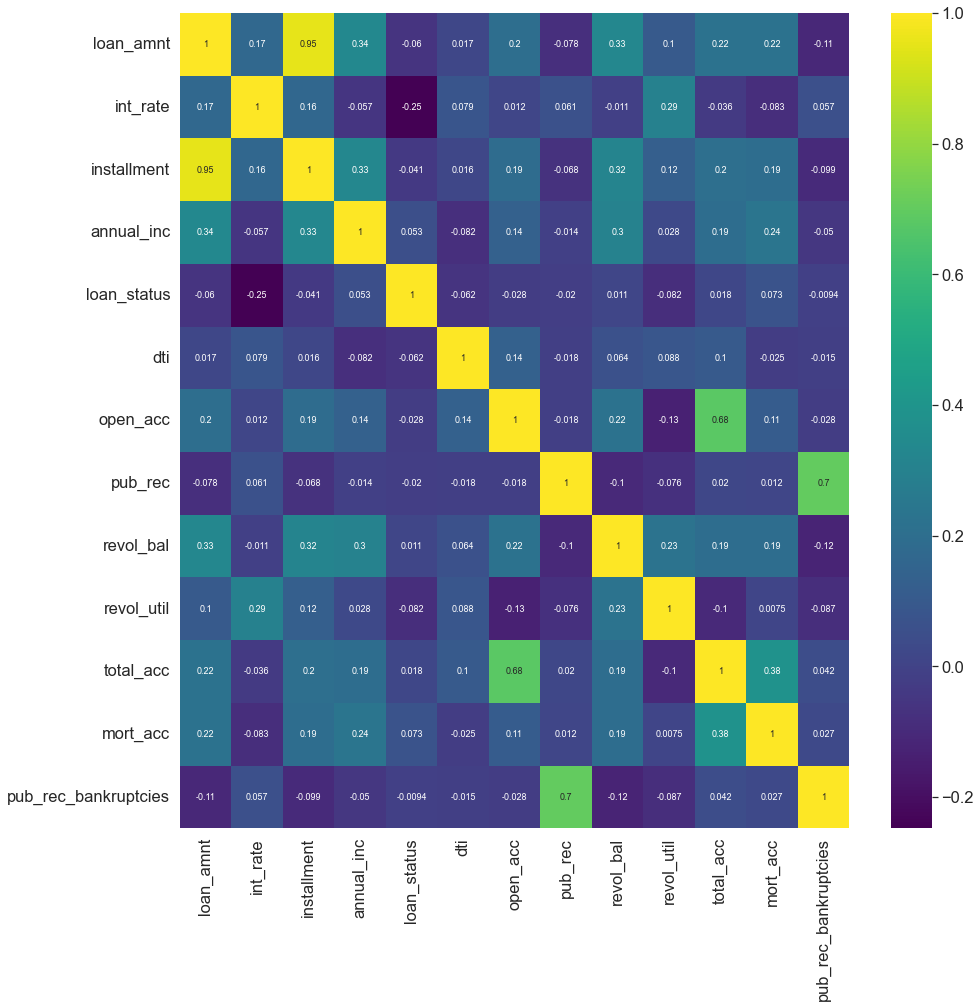

In [49]:
plt.figure(figsize=(15,15))
sns.heatmap(data1.corr(),cmap='viridis',annot=True,annot_kws={'size':9})

**installment and loan_amnt is highly correlated at 0.95**

In [61]:
info[info.LoanStatNew=='installment'].Description

3    The monthly payment owed by the borrower if th...
Name: Description, dtype: object

**pub_rec and pub_rec_bankrupties are correlated at 0.7**

**open_acc and total_acc are correlated at 0.68**